In [1]:
import time
import os, json, joblib
import numpy as np
import pandas as pd
from pathlib import Path
import shap
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv("/Users/yusufaltas/airlaner-passenaer-statisfaction/data/train.csv")

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test = pd.read_csv("/Users/yusufaltas/airlaner-passenaer-statisfaction/data/test.csv")

In [5]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df = pd.concat([ train, test], ignore_index=True)

In [7]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [8]:
def check_df(dataframe, head=5) : 
    print("############## Shape ##############")
    print(dataframe.shape)
    print("############## Types ##############")
    print(dataframe.dtypes)
    print("############## Head  ##############")
    print(dataframe.head(head))
    print("############## Tail  ##############")
    print(dataframe.tail(head))
    print("##############   Na  ##############")
    print(dataframe.isnull().sum())
    print("########## Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

############## Shape ##############
(129880, 25)
############## Types ##############
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight servic

In [9]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


In [10]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


In [11]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


In [12]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [13]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)


In [14]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [ col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    num_but_cat = [ col for col in dataframe .columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [ col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [ col for col in dataframe.columns if dataframe[col].dtypes != "0" ]
    
    num_cols = [ col for col in num_cols if col not in num_but_cat]
    
    print(f"Obsevations: {dataframe.shape[0]}")
    print(f"Variables : {dataframe.shape[1]}")
    print(f"cat_cols : {len(cat_cols)}")
    print(f"num_cols : {len(num_cols)}")
    print(f"cat_but_car : {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")


    return cat_cols, num_cols, cat_but_car, num_but_cat


In [15]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)


Obsevations: 129880
Variables : 25
cat_cols : 19
num_cols : 11
cat_but_car : 0
num_but_cat: 14


In [16]:
cat_cols

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'satisfaction',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [17]:
num_cols


['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [18]:
def cat_summary(dataframe, col_name, plot=False) : 
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),"Ratio" : 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("###################")
    if plot : 
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [19]:
for col in cat_cols:
    cat_summary(df, col)


        Gender      Ratio
Gender                   
Female   65899  50.738374
Male     63981  49.261626
###################
                   Customer Type      Ratio
Customer Type                              
Loyal Customer            106100  81.690791
disloyal Customer          23780  18.309209
###################
                 Type of Travel      Ratio
Type of Travel                            
Business travel           89693  69.058362
Personal Travel           40187  30.941638
###################
          Class      Ratio
Class                     
Business  62160  47.859563
Eco       58309  44.894518
Eco Plus   9411   7.245919
###################
                         satisfaction      Ratio
satisfaction                                    
neutral or dissatisfied         73452  56.553742
satisfied                       56428  43.446258
###################
                       Inflight wifi service      Ratio
Inflight wifi service                                  
2    

In [20]:
def num_summary(dataframe, numerical_col, plot=False) : 
    quantiles = [ 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot :
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


for col in num_cols:
    num_summary(df, col)

count    129880.000000
mean      44158.700000
std       31207.377062
min           0.000000
5%         3246.950000
10%        6493.900000
20%       12987.800000
30%       19481.700000
40%       25975.600000
50%       38963.500000
60%       51951.400000
70%       64939.300000
80%       77927.200000
90%       90915.100000
95%       97409.050000
99%      102604.210000
max      103903.000000
Name: Unnamed: 0, dtype: float64
count    129880.000000
mean      64940.500000
std       37493.270818
min           1.000000
5%         6494.950000
10%       12988.900000
20%       25976.800000
30%       38964.700000
40%       51952.600000
50%       64940.500000
60%       77928.400000
70%       90916.300000
80%      103904.200000
90%      116892.100000
95%      123386.050000
99%      128581.210000
max      129880.000000
Name: id, dtype: float64
count     129880
unique         2
top       Female
freq       65899
Name: Gender, dtype: object
count             129880
unique                 2
top       Loya

In [21]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129880.0,44158.700000,31207.377062,0.0,16234.75,38963.5,71433.25,103903.0
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay in Minutes,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay in Minutes,129487.0,15.091129,38.465650,0.0,0.00,0.0,13.00,1584.0


In [22]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [23]:
df["satisfaction"].value_counts(normalize=True) * 100

satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: proportion, dtype: float64

In [24]:
#Die Daten sind ausgewogen, also gibt es keinen großen Unterschied zwischen den zwei Klassen.
#Beim Trainieren des Modells kann man Accuracy, F1-Score und ROC-AUC sicher verwenden.
#Oversampling oder SMOTE ist nicht nötig, weil kein Klassenungleichgewicht vorhanden ist

In [25]:
df.columns = [col.upper() for col in df.columns]

In [26]:
df.head()

,UNNAMED: 0,ID,GENDER,CUSTOMER TYPE,AGE,TYPE OF TRAVEL,CLASS,FLIGHT DISTANCE,INFLIGHT WIFI SERVICE,DEPARTURE/ARRIVAL TIME CONVENIENT,EASE OF ONLINE BOOKING,GATE LOCATION,FOOD AND DRINK,ONLINE BOARDING,SEAT COMFORT,INFLIGHT ENTERTAINMENT,ON-BOARD SERVICE,LEG ROOM SERVICE,BAGGAGE HANDLING,CHECKIN SERVICE,INFLIGHT SERVICE,CLEANLINESS,DEPARTURE DELAY IN MINUTES,ARRIVAL DELAY IN MINUTES,SATISFACTION
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [27]:
df.drop(columns=["UNNAMED: 0","ID"],inplace=True)

In [28]:
df.head()

,GENDER,CUSTOMER TYPE,AGE,TYPE OF TRAVEL,CLASS,FLIGHT DISTANCE,INFLIGHT WIFI SERVICE,DEPARTURE/ARRIVAL TIME CONVENIENT,EASE OF ONLINE BOOKING,GATE LOCATION,FOOD AND DRINK,ONLINE BOARDING,SEAT COMFORT,INFLIGHT ENTERTAINMENT,ON-BOARD SERVICE,LEG ROOM SERVICE,BAGGAGE HANDLING,CHECKIN SERVICE,INFLIGHT SERVICE,CLEANLINESS,DEPARTURE DELAY IN MINUTES,ARRIVAL DELAY IN MINUTES,SATISFACTION
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [29]:
df["SATISFACTION"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [30]:
df["SATISFACTION_CLEAN"] = df["SATISFACTION"].str.strip()

df["SATISFACTION_BIN"] = df["SATISFACTION_CLEAN"].apply(
    lambda x: 1 if x == "satisfied" else 0
)

In [31]:
df["SATISFACTION_BIN"].value_counts()

SATISFACTION_BIN
0    73452
1    56428
Name: count, dtype: int64

In [32]:
def target_summary_with_cat(dataframe, target, categorical_col):
    summary = (
        dataframe
        .groupby(categorical_col)[target]
        .mean()
        .sort_values(ascending=False)
    )
    print(f"###### {categorical_col} ######")
    print(pd.DataFrame({"MEAN_SATISFACTION": summary}), "\n")

In [33]:
cat_cols = ["GENDER", "CUSTOMER TYPE", "TYPE OF TRAVEL", "CLASS"]

for col in cat_cols:
    target_summary_with_cat(df, "SATISFACTION_BIN", col)

###### GENDER ######
        MEAN_SATISFACTION
GENDER                   
Male             0.440115
Female           0.428975 

###### CUSTOMER TYPE ######
                   MEAN_SATISFACTION
CUSTOMER TYPE                       
Loyal Customer              0.478115
disloyal Customer           0.239697 

###### TYPE OF TRAVEL ######
                 MEAN_SATISFACTION
TYPE OF TRAVEL                    
Business travel           0.583724
Personal Travel           0.101326 

###### CLASS ######
          MEAN_SATISFACTION
CLASS                      
Business           0.694434
Eco Plus           0.246414
Eco                0.187673 



In [34]:
num_cols = [col for col in df.columns if df[col].dtype in ["int64", "float64"]]
num_cols

['AGE',
 'FLIGHT DISTANCE',
 'INFLIGHT WIFI SERVICE',
 'DEPARTURE/ARRIVAL TIME CONVENIENT',
 'EASE OF ONLINE BOOKING',
 'GATE LOCATION',
 'FOOD AND DRINK',
 'ONLINE BOARDING',
 'SEAT COMFORT',
 'INFLIGHT ENTERTAINMENT',
 'ON-BOARD SERVICE',
 'LEG ROOM SERVICE',
 'BAGGAGE HANDLING',
 'CHECKIN SERVICE',
 'INFLIGHT SERVICE',
 'CLEANLINESS',
 'DEPARTURE DELAY IN MINUTES',
 'ARRIVAL DELAY IN MINUTES',
 'SATISFACTION_BIN']

In [35]:
for col in num_cols:
    if col != "SATISFACTION_BIN":
        print(f"{col} → correlation:",
              df[[col, "SATISFACTION_BIN"]].corr().iloc[0,1])

AGE → correlation: 0.13409123867754513
FLIGHT DISTANCE → correlation: 0.2980848985459369
INFLIGHT WIFI SERVICE → correlation: 0.2834602301012118
DEPARTURE/ARRIVAL TIME CONVENIENT → correlation: -0.05426971049373539
EASE OF ONLINE BOOKING → correlation: 0.16887713905283255
GATE LOCATION → correlation: -0.0027932746524710972
FOOD AND DRINK → correlation: 0.2113402076250702
ONLINE BOARDING → correlation: 0.5017494207376232
SEAT COMFORT → correlation: 0.3488293461025942
INFLIGHT ENTERTAINMENT → correlation: 0.3982336506118758
ON-BOARD SERVICE → correlation: 0.32220482339270523
LEG ROOM SERVICE → correlation: 0.31242381949447834
BAGGAGE HANDLING → correlation: 0.2486799187751351
CHECKIN SERVICE → correlation: 0.23725236030900076
INFLIGHT SERVICE → correlation: 0.2449178357456949
CLEANLINESS → correlation: 0.3070346705632918
DEPARTURE DELAY IN MINUTES → correlation: -0.050739865952256186
ARRIVAL DELAY IN MINUTES → correlation: -0.05827509268286855


In [37]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None)

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit


In [38]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns


In [39]:
for col in num_cols:
    if col != "SATISFACTION_BIN":
        replace_with_thresholds(df, col)


/var/folders/gm/0rqrjs0d4sj_dcspdmk41n8w0000gn/T/ipykernel_3248/2811854049.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-58.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
/var/folders/gm/0rqrjs0d4sj_dcspdmk41n8w0000gn/T/ipykernel_3248/2811854049.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4627.624999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
/var/folders/gm/0rqrjs0d4sj_dcspdmk41n8w0000gn/T/ipykernel_3248/2811854049.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-7.5' has dtype incompat

In [40]:
for col in num_cols:
    if col != "SATISFACTION_BIN":
        print(col, ":", check_outlier(df, col))

AGE : False
FLIGHT DISTANCE : False
INFLIGHT WIFI SERVICE : False
DEPARTURE/ARRIVAL TIME CONVENIENT : False
EASE OF ONLINE BOOKING : False
GATE LOCATION : False
FOOD AND DRINK : False
ONLINE BOARDING : False
SEAT COMFORT : False
INFLIGHT ENTERTAINMENT : False
ON-BOARD SERVICE : False
LEG ROOM SERVICE : False
BAGGAGE HANDLING : False
CHECKIN SERVICE : False
INFLIGHT SERVICE : False
CLEANLINESS : False
DEPARTURE DELAY IN MINUTES : False
ARRIVAL DELAY IN MINUTES : False


In [41]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns


In [42]:
missing_values_table(df)

                          n_miss  ratio
ARRIVAL DELAY IN MINUTES     393    0.3


In [43]:
df["ARRIVAL DELAY IN MINUTES"].fillna(
    df["ARRIVAL DELAY IN MINUTES"].median(),
    inplace=True
)

/var/folders/gm/0rqrjs0d4sj_dcspdmk41n8w0000gn/T/ipykernel_3248/1353522748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ARRIVAL DELAY IN MINUTES"].fillna(


In [44]:
df["ARRIVAL DELAY IN MINUTES"].isnull().sum()

0

In [45]:
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

y = df["SATISFACTION_BIN"]
X = df.drop(["SATISFACTION_BIN"], axis=1)

In [46]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                            'RATIO': dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

In [47]:
rare_analyser(df, "SATISFACTION_BIN", cat_cols)

GENDER : 2
        COUNT     RATIO  TARGET_MEAN
GENDER                              
Female  65899  0.507384    -0.011071
Male    63981  0.492616     0.011403


CUSTOMER TYPE : 2
                    COUNT     RATIO  TARGET_MEAN
CUSTOMER TYPE                                   
Loyal Customer     106100  0.816908     0.088065
disloyal Customer   23780  0.183092    -0.392921


TYPE OF TRAVEL : 2
                 COUNT     RATIO  TARGET_MEAN
TYPE OF TRAVEL                               
Business travel  89693  0.690584     0.301122
Personal Travel  40187  0.309416    -0.672071


CLASS : 3
          COUNT     RATIO  TARGET_MEAN
CLASS                                 
Business  62160  0.478596     0.524467
Eco       58309  0.448945    -0.497875
Eco Plus   9411  0.072459    -0.379371




In [48]:
service_cols = [
    "INFLIGHT WIFI SERVICE",
    "SEAT COMFORT",
    "INFLIGHT ENTERTAINMENT",
    "LEG ROOM SERVICE",
    "ON-BOARD SERVICE",
    "CLEANLINESS"
]

df["SERVICE_QUALITY_SCORE"] = df[service_cols].mean(axis=1)

In [49]:
digital_cols = [
    "INFLIGHT WIFI SERVICE",
    "ONLINE BOARDING",
    "EASE OF ONLINE BOOKING"
]

df["DIGITAL_EXPERIENCE_SCORE"] = df[digital_cols].mean(axis=1)

In [50]:
airport_cols = [
    "GATE LOCATION",
    "DEPARTURE/ARRIVAL TIME CONVENIENT",
    "CHECKIN SERVICE"
]

df["AIRPORT_EXPERIENCE_SCORE"] = df[airport_cols].mean(axis=1)

In [51]:
df["HAS_DELAY"] = (
    (df["DEPARTURE DELAY IN MINUTES"] > 0) |
    (df["ARRIVAL DELAY IN MINUTES"] > 0)
).astype(int)

In [52]:
df["TOTAL_DELAY"] = (
    df["DEPARTURE DELAY IN MINUTES"] +
    df["ARRIVAL DELAY IN MINUTES"]
)

In [53]:
df["LONG_FLIGHT"] = (
    df["FLIGHT DISTANCE"] > df["FLIGHT DISTANCE"].median()
).astype(int)

In [54]:
df["HIGH_EXPECTATION_PASSENGER"] = (
    (df["TYPE OF TRAVEL"] == 1) &  # Business travel
    (df["CLASS"] == 2)             # Business class
).astype(int)

In [55]:
df["COMFORT_DISTANCE_RATIO"] = (
    df["SEAT COMFORT"] / (df["FLIGHT DISTANCE"] + 1)
)

In [56]:
df["SERVICE_VARIANCE"] = df[service_cols].std(axis=1)

In [57]:
df.select_dtypes(include=["object"]).columns

Index(['GENDER', 'CUSTOMER TYPE', 'TYPE OF TRAVEL', 'CLASS', 'SATISFACTION', 'SATISFACTION_CLEAN'], dtype='object')

In [58]:
df.shape

(129880, 34)

In [59]:
df.drop(columns=["SATISFACTION", "SATISFACTION_CLEAN"], inplace=True)

In [60]:

def binary_cols(dataframe):
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ['int64', 'float64'] and dataframe[col].nunique() <= 2]
    return binary_cols

In [61]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [62]:
binary_cols = binary_cols(df)

In [63]:
for col in binary_cols:
    df = label_encoder(df, col)

In [64]:
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(10)

,GENDER,CUSTOMER TYPE,AGE,TYPE OF TRAVEL,CLASS,FLIGHT DISTANCE,INFLIGHT WIFI SERVICE,DEPARTURE/ARRIVAL TIME CONVENIENT,EASE OF ONLINE BOOKING,GATE LOCATION,FOOD AND DRINK,ONLINE BOARDING,SEAT COMFORT,INFLIGHT ENTERTAINMENT,ON-BOARD SERVICE,LEG ROOM SERVICE,BAGGAGE HANDLING,CHECKIN SERVICE,INFLIGHT SERVICE,CLEANLINESS,DEPARTURE DELAY IN MINUTES,ARRIVAL DELAY IN MINUTES,SATISFACTION_BIN,SERVICE_QUALITY_SCORE,DIGITAL_EXPERIENCE_SCORE,AIRPORT_EXPERIENCE_SCORE,HAS_DELAY,TOTAL_DELAY,LONG_FLIGHT,HIGH_EXPECTATION_PASSENGER,COMFORT_DISTANCE_RATIO,SERVICE_VARIANCE
0,1,0,-1.125000,1,Eco Plus,-0.288722,0.0,0.5,0.0,-1.0,1.0,0.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.5,1.0,2.083333,1.384615,0.0,0.688929,0.063500,-0.127036,1,0.467098,0,0,4.411349,0.649161
1,1,1,-0.625000,0,Business,-0.457895,0.0,-0.5,0.0,0.0,-1.0,0.0,-1.000000,-1.5,-1.5,0.5,-0.5,-2.0,0.0,-1.0,0.083333,0.461538,0.0,-0.958837,0.063500,-0.832036,0,-0.671621,0,0,-43.809647,1.349151
2,0,0,-0.583333,0,Business,0.224060,-0.5,-0.5,-0.5,-0.5,1.0,1.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.563553,0.068513,-0.302978,0,-0.891612,1,0,1.241570,0.813397
3,0,0,-0.625000,0,Business,-0.212030,-0.5,1.0,1.0,1.0,-0.5,-0.5,-0.666667,-1.0,-1.0,0.5,-0.5,-2.0,0.0,-0.5,0.916667,0.692308,0.0,-0.576588,0.041566,0.344395,0,-0.259898,0,0,-2.952182,0.918576
4,1,0,0.875000,0,Business,-0.473684,0.0,0.0,0.0,0.0,0.5,1.0,0.333333,-0.5,-0.5,0.0,0.0,0.0,-0.5,0.0,0.000000,0.000000,1.0,0.182453,0.557066,-0.087187,0,-0.891612,0,0,55.763771,0.581207
5,0,0,-0.583333,1,Eco,0.252632,0.0,0.5,-0.5,-1.0,-1.0,-0.5,-1.000000,-1.5,-0.5,0.0,0.0,1.0,0.0,-1.0,0.000000,0.000000,0.0,-0.826479,-0.421084,-0.127036,0,-0.891612,1,0,-1.869860,1.081934
6,1,0,0.291667,1,Eco,0.324812,-0.5,0.5,-0.5,0.0,-0.5,-0.5,-0.666667,-1.0,-0.5,-0.5,0.0,0.0,0.5,-0.5,0.750000,1.769231,0.0,-0.700342,-0.671836,0.131144,1,0.115782,1,0,-1.006106,0.375767
7,0,0,0.500000,0,Business,0.895489,0.5,0.0,0.5,0.5,1.0,1.0,0.333333,0.5,0.5,0.5,0.5,1.0,0.5,0.5,0.333333,0.000000,1.0,1.070171,1.045618,0.436791,0,-0.764568,1,0,0.639701,0.281707
8,0,0,0.041667,0,Business,0.006767,-1.0,-0.5,-0.5,-0.5,0.5,0.0,-0.333333,-1.5,-1.5,-1.0,-1.5,1.0,-1.5,-0.5,0.000000,0.000000,0.0,-1.209925,-0.675805,-0.302978,0,-0.891612,1,0,-0.505493,0.562857
9,1,1,-0.833333,0,Eco,0.163158,0.0,0.0,0.0,0.5,-0.5,0.0,-0.333333,-1.0,-1.0,-0.5,0.0,1.0,-0.5,-0.5,0.000000,0.000000,0.0,-0.578126,0.063500,0.436791,0,-0.891612,1,0,-0.384380,0.523263


In [65]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [66]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [67]:
df.head()

,AGE,FLIGHT DISTANCE,INFLIGHT WIFI SERVICE,DEPARTURE/ARRIVAL TIME CONVENIENT,EASE OF ONLINE BOOKING,GATE LOCATION,FOOD AND DRINK,ONLINE BOARDING,SEAT COMFORT,INFLIGHT ENTERTAINMENT,ON-BOARD SERVICE,LEG ROOM SERVICE,BAGGAGE HANDLING,CHECKIN SERVICE,INFLIGHT SERVICE,CLEANLINESS,DEPARTURE DELAY IN MINUTES,ARRIVAL DELAY IN MINUTES,SATISFACTION_BIN,SERVICE_QUALITY_SCORE,DIGITAL_EXPERIENCE_SCORE,AIRPORT_EXPERIENCE_SCORE,HAS_DELAY,TOTAL_DELAY,LONG_FLIGHT,HIGH_EXPECTATION_PASSENGER,COMFORT_DISTANCE_RATIO,SERVICE_VARIANCE,GENDER_1,CUSTOMER TYPE_1,TYPE OF TRAVEL_1,CLASS_Eco,CLASS_Eco Plus
0,-1.125000,-0.288722,0.0,0.5,0.0,-1.0,1.0,0.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.5,1.0,2.083333,1.384615,0.0,0.688929,0.063500,-0.127036,1,0.467098,0,0,4.411349,0.649161,True,False,True,False,True
1,-0.625000,-0.457895,0.0,-0.5,0.0,0.0,-1.0,0.0,-1.000000,-1.5,-1.5,0.5,-0.5,-2.0,0.0,-1.0,0.083333,0.461538,0.0,-0.958837,0.063500,-0.832036,0,-0.671621,0,0,-43.809647,1.349151,True,True,False,False,False
2,-0.583333,0.224060,-0.5,-0.5,-0.5,-0.5,1.0,1.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.563553,0.068513,-0.302978,0,-0.891612,1,0,1.241570,0.813397,False,False,False,False,False
3,-0.625000,-0.212030,-0.5,1.0,1.0,1.0,-0.5,-0.5,-0.666667,-1.0,-1.0,0.5,-0.5,-2.0,0.0,-0.5,0.916667,0.692308,0.0,-0.576588,0.041566,0.344395,0,-0.259898,0,0,-2.952182,0.918576,False,False,False,False,False
4,0.875000,-0.473684,0.0,0.0,0.0,0.0,0.5,1.0,0.333333,-0.5,-0.5,0.0,0.0,0.0,-0.5,0.0,0.000000,0.000000,1.0,0.182453,0.557066,-0.087187,0,-0.891612,0,0,55.763771,0.581207,True,False,False,False,False


    BASE MODEL

In [68]:
y = df["SATISFACTION_BIN"]
X = df.drop(["SATISFACTION_BIN"], axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [70]:

def base_models(X, y):
    print("Base Models....")
    
    classifiers = [
        ('LR', LogisticRegression(max_iter=2000)),
        ('KNN', KNeighborsClassifier()),
        ("CART", DecisionTreeClassifier()),
        ("RF", RandomForestClassifier()),
        ('GBM', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('LightGBM', LGBMClassifier()),
        # ('CatBoost', CatBoostClassifier(verbose=False))
    ]

    scoring = {
        "roc_auc": "roc_auc",
        "f1": "f1",
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall"
    }

    for name, classifier in classifiers:
        cv_results = cross_validate(
            classifier,
            X,
            y,
            cv=3,
            scoring=scoring
        )

        print(f"\n{name}")
        print(f"ROC-AUC  : {cv_results['test_roc_auc'].mean():.4f}")
        print(f"F1       : {cv_results['test_f1'].mean():.4f}")
        print(f"Accuracy : {cv_results['test_accuracy'].mean():.4f}")
        print(f"Precision: {cv_results['test_precision'].mean():.4f}")
        print(f"Recall   : {cv_results['test_recall'].mean():.4f}")

base_models(X, y)

Base Models....

LR
ROC-AUC  : 0.9404
F1       : 0.8706
Accuracy : 0.8898
Precision: 0.8885
Recall   : 0.8535

KNN
ROC-AUC  : 0.9547
F1       : 0.8862
Accuracy : 0.9045
Precision: 0.9182
Recall   : 0.8563

CART
ROC-AUC  : 0.9407
F1       : 0.9327
Accuracy : 0.9413
Precision: 0.9296
Recall   : 0.9358

RF
ROC-AUC  : 0.9931
F1       : 0.9526
Accuracy : 0.9595
Precision: 0.9681
Recall   : 0.9376

GBM
ROC-AUC  : 0.9878
F1       : 0.9315
Accuracy : 0.9413
Precision: 0.9460
Recall   : 0.9174


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
ROC-AUC  : 0.9947
F1       : 0.9557
Accuracy : 0.9620
Precision: 0.9698
Recall   : 0.9419
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37618, number of negative: 48968
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2145
[LightGBM] [Info] Number of data points in the train set: 86586, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434458 -> initscore=-0.263684
[LightGBM] [Info] Start training from score -0.263684
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37619, number of negative: 48968
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=17,
    stratify=y
)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)


xgboost_model = XGBClassifier(
    random_state=17,
    eval_metric="logloss",
    n_jobs=1,          
    verbosity=0
)


xgboost_params = {
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [5, 8, 12, 15, 20],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


xgboost_best_grid = GridSearchCV(
    estimator=xgboost_model,
    param_grid=xgboost_params,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True,
    return_train_score=True,
    error_score="raise"
)

xgboost_best_grid.fit(X_train, y_train)

best_params = xgboost_best_grid.best_params_
best_cv_score = xgboost_best_grid.best_score_

print("Best ROC-AUC (CV on TRAIN):", best_cv_score)
print("Best Params:", best_params)

xgboost_final = XGBClassifier(
    random_state=17,
    eval_metric="logloss",
    n_jobs=1,
    verbosity=0,
    **best_params
)

xgboost_final.fit(X_train, y_train)


train_proba = xgboost_final.predict_proba(X_train)[:, 1]
test_proba  = xgboost_final.predict_proba(X_test)[:, 1]

print("\nTrain ROC-AUC:", roc_auc_score(y_train, train_proba))
print("Test  ROC-AUC:", roc_auc_score(y_test, test_proba))


test_pred = (test_proba >= 0.5).astype(int)

print("\nTEST Accuracy:", accuracy_score(y_test, test_pred))
print("TEST F1      :", f1_score(y_test, test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("\nClassification Report:\n", classification_report(y_test, test_pred, digits=4))


scoring = {"accuracy": "accuracy", "f1": "f1", "roc_auc": "roc_auc"}
cv_results = cross_validate(xgboost_final, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("\nCV (TRAIN) Accuracy:", cv_results["test_accuracy"].mean())
print("CV (TRAIN) F1      :", cv_results["test_f1"].mean())
print("CV (TRAIN) ROC-AUC  :", cv_results["test_roc_auc"].mean())

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500; total time=   2.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=100; total time=   1.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500; total time=   6.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500; total time=   2.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=100; total time=   1.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500; total time=   6.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=100; total time=   1.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500; total time=   6

In [72]:

test_proba = xgboost_final.predict_proba(X_test)[:, 1]
print("TEST ROC-AUC:", roc_auc_score(y_test, test_proba))

TEST ROC-AUC: 0.9950740068811798


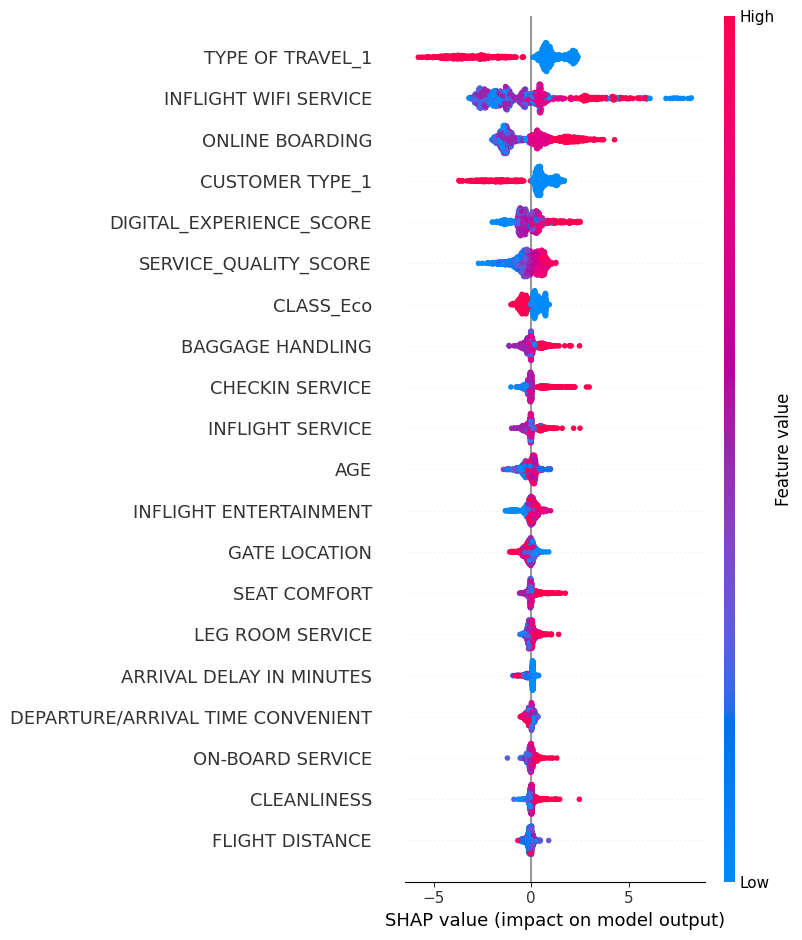

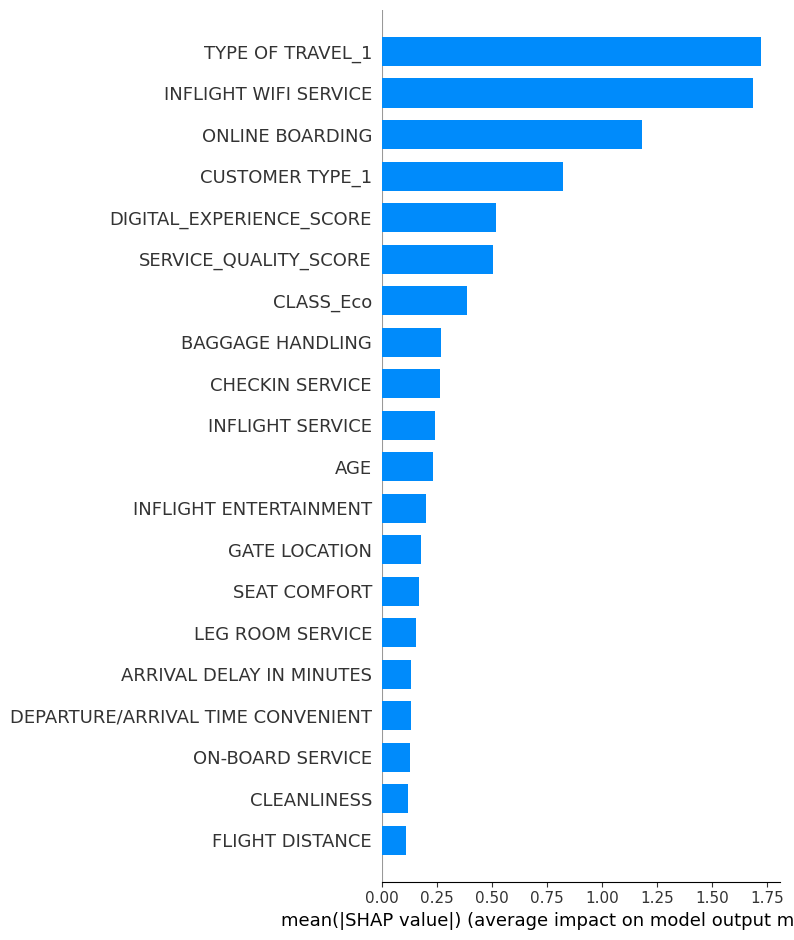

In [73]:
X_shap = X_train.sample(1000, random_state=42)

explainer = shap.TreeExplainer(xgboost_final)
shap_values = explainer.shap_values(X_shap)

shap.summary_plot(shap_values, X_shap, show=False)
plt.show()

shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False)
plt.show()

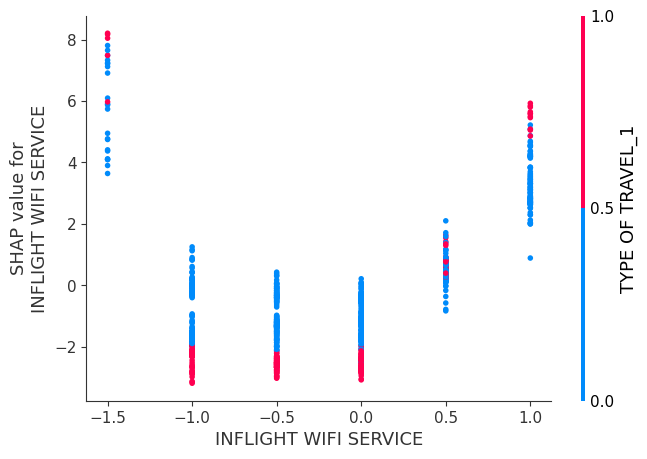

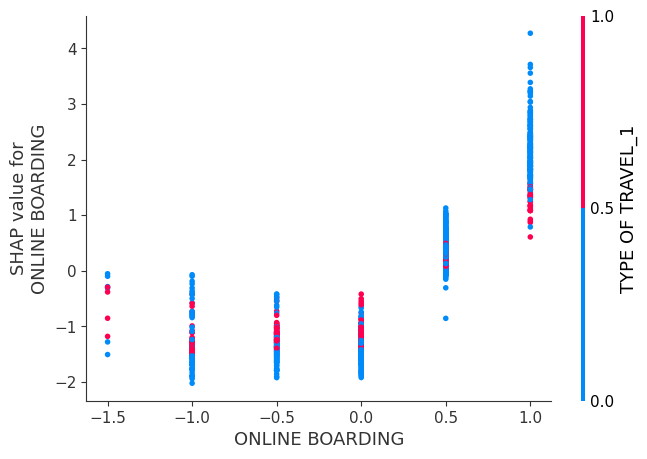

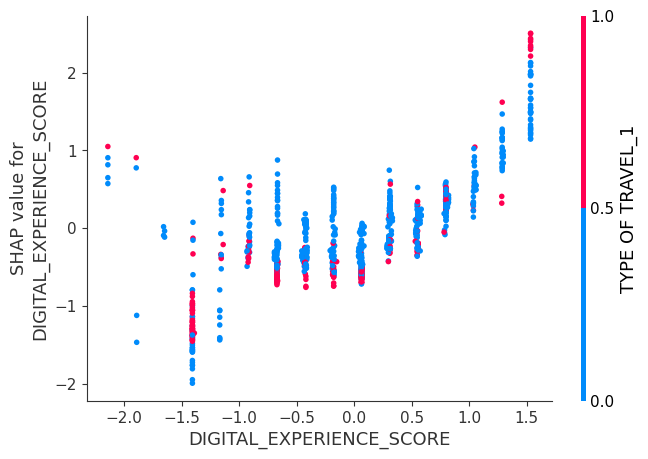

In [74]:
top_feats = ["INFLIGHT WIFI SERVICE", "ONLINE BOARDING", "DIGITAL_EXPERIENCE_SCORE"]
for f in top_feats:
    shap.dependence_plot(f, shap_values, X_shap, show=False)
    plt.show()

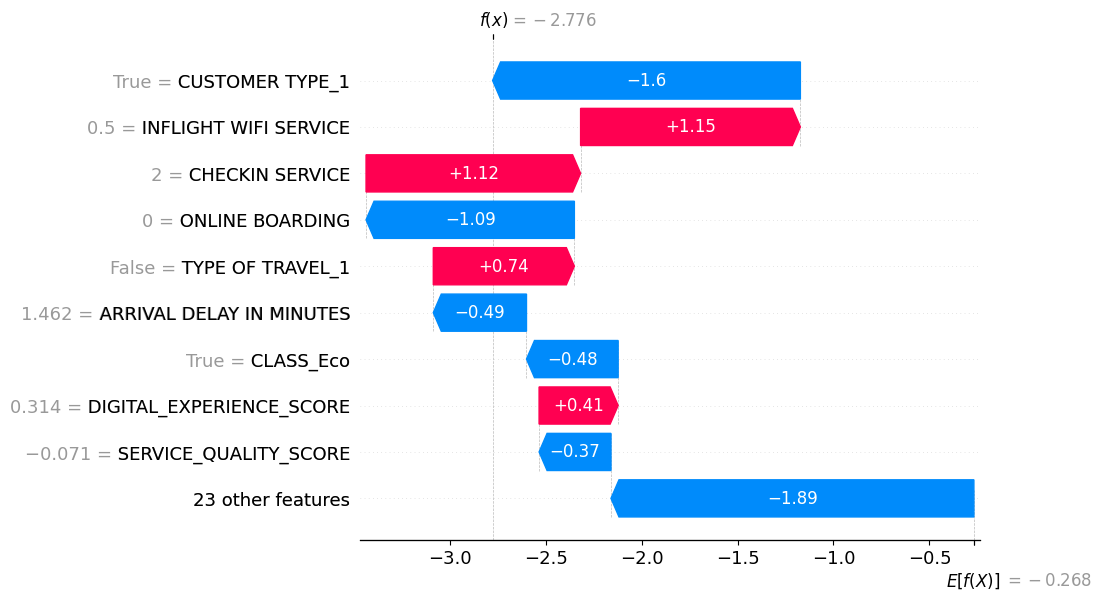

In [75]:
i = 0
sv = explainer(X_shap.iloc[[i]]) 
shap.plots.waterfall(sv[0]) 

In [76]:
pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("model", XGBClassifier(
            random_state=17,
            eval_metric="logloss",
            n_jobs=1,
            verbosity=0,
            **best_params
        ))
    ]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=1,
                               num_parallel_tree=None, random_state=17, ...))])

In [77]:
y_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

print("TEST ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=4))

TEST ROC-AUC: 0.9950740068811798
              precision    recall  f1-score   support

         0.0     0.9581    0.9801    0.9689     14690
         1.0     0.9732    0.9442    0.9585     11286

    accuracy                         0.9645     25976
   macro avg     0.9657    0.9621    0.9637     25976
weighted avg     0.9647    0.9645    0.9644     25976



In [78]:


os.makedirs("models", exist_ok=True)


joblib.dump(pipeline, "models/xgb_pipeline.joblib")


features = list(X.columns)
with open("models/features.json", "w", encoding="utf-8") as f:
    json.dump(features, f, ensure_ascii=False, indent=2)

print("Saved:")
print("- models/xgb_pipeline.joblib")
print("- models/features.json")
print("n_features:", len(features))

Saved:
- models/xgb_pipeline.joblib
- models/features.json
n_features: 32


In [79]:

joblib.dump(pipeline, "xgb_pipeline.joblib")
joblib.dump(pipeline, "models/xgb_pipeline.joblib")

print("Pipeline re-saved with current environment.")

Pipeline re-saved with current environment.


In [80]:
MODEL_PATH = Path("models/xgb_pipeline.joblib").resolve()
print(MODEL_PATH.exists())

pipeline = joblib.load(MODEL_PATH)
print("Pipeline loaded successfully")

True
Pipeline loaded successfully


In [81]:


os.makedirs("models", exist_ok=True)


best_params = {
    "n_estimators": 500,
    "max_depth": 5,
    "learning_rate": 0.01,
    "colsample_bytree": 0.5
}

pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("model", XGBClassifier(
            random_state=42,
            eval_metric="logloss",
            n_jobs=1,
            verbosity=0,
            **best_params
        ))
    ]
)

pipeline.fit(X_train, y_train)


joblib.dump(pipeline, "models/xgb_pipeline.joblib")
print("Saved -> models/xgb_pipeline.joblib")

Saved -> models/xgb_pipeline.joblib
